# Analysis

#### Contents
 - [Import for Analysis](#Import-for-Analysis)
 - [Autocorrelation](#Autocorrelation)
 - [Auto-Regression](#Auto-Regression)
 - [Comparison](#Comparison)

## Import for Analysis
[(back to top)](#Analysis)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.simplefilter('ignore')

In [6]:
df = pd.read_csv('../data/elec_mo_2001_2011_consumption.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [8]:
df_nc = df[df['STATE'] == 'NC']

In [9]:
X = df_nc.drop(columns=['CONSUMPTION'])
y = df_nc['CONSUMPTION']

In [10]:
X_train = X[X.index.year < 2010]
X_test = X[X.index.year >= 2010]
y_train = y[y.index.year < 2010]
y_test = y[y.index.year >= 2010]

## Autocorrelation
[(back to top)](#Analysis)

### ACF
#### (Auto-Correlation Function)
[(back to top)](#Analysis)

Looking at the Auto-Correlation Function (ACF) we see tht there is a distinct correlation when lag equals 12, which coincides with our data, which is monthly.

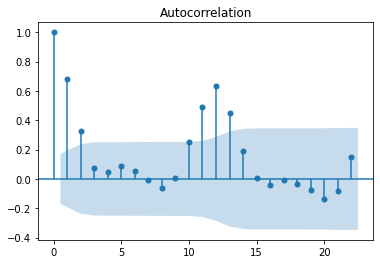

In [19]:
plot_acf(y);

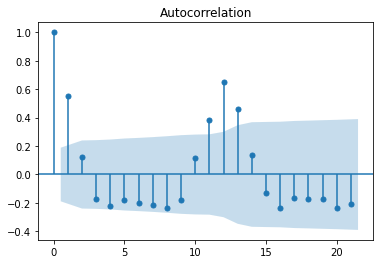

In [20]:
plot_acf(y_train);

### PACF
#### (Partial Auto-Correlation Function)
[(back to top)](#Analysis)

Looking at the Partial Auto-Correlation Function (PACF) we see a correlation when lag equals 12, which coincides with our data, which is monthly. But when looking at all data (not just the training data), there appears to be a possible correlation when lag equals 10. 

This is surprising to me, and I am curious to know if this correlation would become more pronounced with more data.

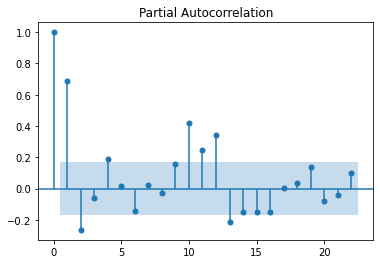

In [21]:
plot_pacf(y);

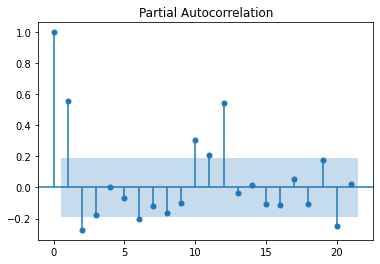

In [22]:
plot_pacf(y_train);

## Comparison
[(back to top)](#Analysis)

The best model is probably the __*Holt-Winters Model*__, performing with a RMSE of 3631847 and a MAE of 2920368.

Comparatively, the __*Null Model*__ did not perform great with a RMSE of 5359973 and a MAE of 4164017.

The __*Seasonal Model*__ appears to have done better than the most of the models with a RMSE of 4294624 and a MAE of 3603229.

The __*SARIMAX Model*__ did well  with a RMSE of 4713245 and a MAE of 3813522.

However, the SARIMAX Model was outperformed by the __*Auto-Regression Model*__ with a RMSE of 4414239 and a MAE of  3663597.

| Model\Score     | RMSE    | MAE     |
|---              |---      |---      |
| Holt-Winters    | 3631847 | 2920368 |
| Seasonal        | 4294624 | 3603229 |
| Auto-Regression | 4414239 | 3663597 |
| SARIMAX         | 4713245 | 3813522 |
| Null Model      | 5359973 | 4164017 |



